In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
dataset = pd.read_csv('Admission_Predict.csv')

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
dataset.drop('Serial No.', inplace = True, axis = 1)


<AxesSubplot:>

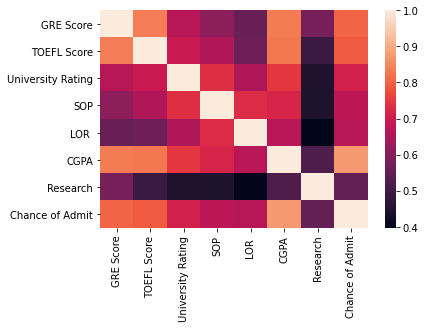

In [8]:
sns.heatmap(dataset.corr())

In [9]:
y = dataset['Chance of Admit']
x = dataset
x.drop('Chance of Admit', axis = 1, inplace = True)

In [17]:
x.drop(columns = ['University Rating', 'SOP', 'LOR '], inplace = True, axis = 1)

In [19]:
x.drop('Research', inplace = True, axis = 1)
x.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regressor.score(x_train, y_train)

0.7914014538084668

In [24]:
regressor.score(x_test, y_test)

0.7675460466703046

In [25]:
regressor.predict([[330, 110, 8.6]])

array([0.76681002])